In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [2]:
df=pd.read_csv('Engineering_graduate_salary.csv')
pd.set_option('display.max_rows', None)
pd. set_option('display.max_columns', 500)
df.head()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,B.Tech/B.E.,instrumentation and control engineering,73.82,6920,1,Delhi,2013,650,665,810,0.694479,485,366,-1,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,B.Tech/B.E.,computer science & engineering,65.00,6624,0,Uttar Pradesh,2014,440,435,210,0.342315,365,-1,-1,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,B.Tech/B.E.,electronics & telecommunications,61.94,9084,0,Maharashtra,2011,485,475,505,0.824666,-1,400,-1,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,B.Tech/B.E.,computer science & engineering,80.40,8195,1,Delhi,2013,675,620,635,0.990009,655,-1,-1,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,B.Tech/B.E.,biotechnology,64.30,4889,1,Tamil Nadu,2012,575,495,365,0.278457,315,-1,-1,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2998 non-null   int64  
 1   Gender                 2998 non-null   object 
 2   DOB                    2998 non-null   object 
 3   10percentage           2998 non-null   float64
 4   10board                2998 non-null   object 
 5   12graduation           2998 non-null   int64  
 6   12percentage           2998 non-null   float64
 7   12board                2998 non-null   object 
 8   CollegeID              2998 non-null   int64  
 9   CollegeTier            2998 non-null   int64  
 10  Degree                 2998 non-null   object 
 11  Specialization         2998 non-null   object 
 12  collegeGPA             2998 non-null   float64
 13  CollegeCityID          2998 non-null   int64  
 14  CollegeCityTier        2998 non-null   int64  
 15  Coll

In [4]:
df['DOB'] = pd.to_datetime(df['DOB'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     2998 non-null   int64         
 1   Gender                 2998 non-null   object        
 2   DOB                    2998 non-null   datetime64[ns]
 3   10percentage           2998 non-null   float64       
 4   10board                2998 non-null   object        
 5   12graduation           2998 non-null   int64         
 6   12percentage           2998 non-null   float64       
 7   12board                2998 non-null   object        
 8   CollegeID              2998 non-null   int64         
 9   CollegeTier            2998 non-null   int64         
 10  Degree                 2998 non-null   object        
 11  Specialization         2998 non-null   object        
 12  collegeGPA             2998 non-null   float64       
 13  Col

In [6]:
df['year'] = pd.DatetimeIndex(df['DOB']).year
df["Current_Year"]=2022
df['Age']=df["Current_Year"]-df['year']
df["Age"]

0       32
1       32
2       33
3       31
4       32
5       33
6       33
7       31
8       30
9       29
10      32
11      30
12      31
13      30
14      31
15      32
16      34
17      30
18      31
19      31
20      35
21      30
22      36
23      34
24      31
25      32
26      30
27      34
28      32
29      33
30      30
31      30
32      32
33      32
34      31
35      31
36      31
37      30
38      31
39      34
40      32
41      31
42      36
43      31
44      34
45      31
46      31
47      38
48      32
49      32
50      32
51      32
52      32
53      29
54      29
55      32
56      31
57      32
58      31
59      35
60      30
61      30
62      30
63      30
64      31
65      33
66      31
67      32
68      31
69      29
70      31
71      32
72      31
73      30
74      33
75      29
76      30
77      36
78      30
79      33
80      31
81      33
82      32
83      30
84      33
85      31
86      31
87      30
88      32
89      32
90      30

In [7]:
df.head()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary,year,Current_Year,Age
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,B.Tech/B.E.,instrumentation and control engineering,73.82,6920,1,Delhi,2013,650,665,810,0.694479,485,366,-1,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000,1990,2022,32
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,B.Tech/B.E.,computer science & engineering,65.00,6624,0,Uttar Pradesh,2014,440,435,210,0.342315,365,-1,-1,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000,1990,2022,32
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,B.Tech/B.E.,electronics & telecommunications,61.94,9084,0,Maharashtra,2011,485,475,505,0.824666,-1,400,-1,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000,1989,2022,33
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,B.Tech/B.E.,computer science & engineering,80.40,8195,1,Delhi,2013,675,620,635,0.990009,655,-1,-1,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000,1991,2022,31
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,B.Tech/B.E.,biotechnology,64.30,4889,1,Tamil Nadu,2012,575,495,365,0.278457,315,-1,-1,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000,1990,2022,32


In [8]:
df.isnull().sum()

ID                       0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
Salary                   0
year                     0
Current_Year             0
Age                      0
d

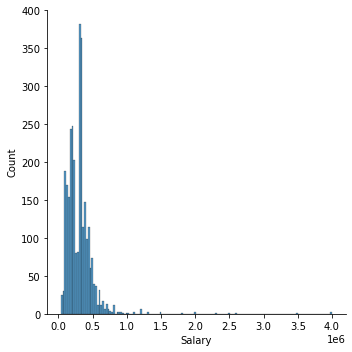

In [9]:
sns.displot(df,x="Salary")

In [10]:
#sns.pairplot(df)

<AxesSubplot:>

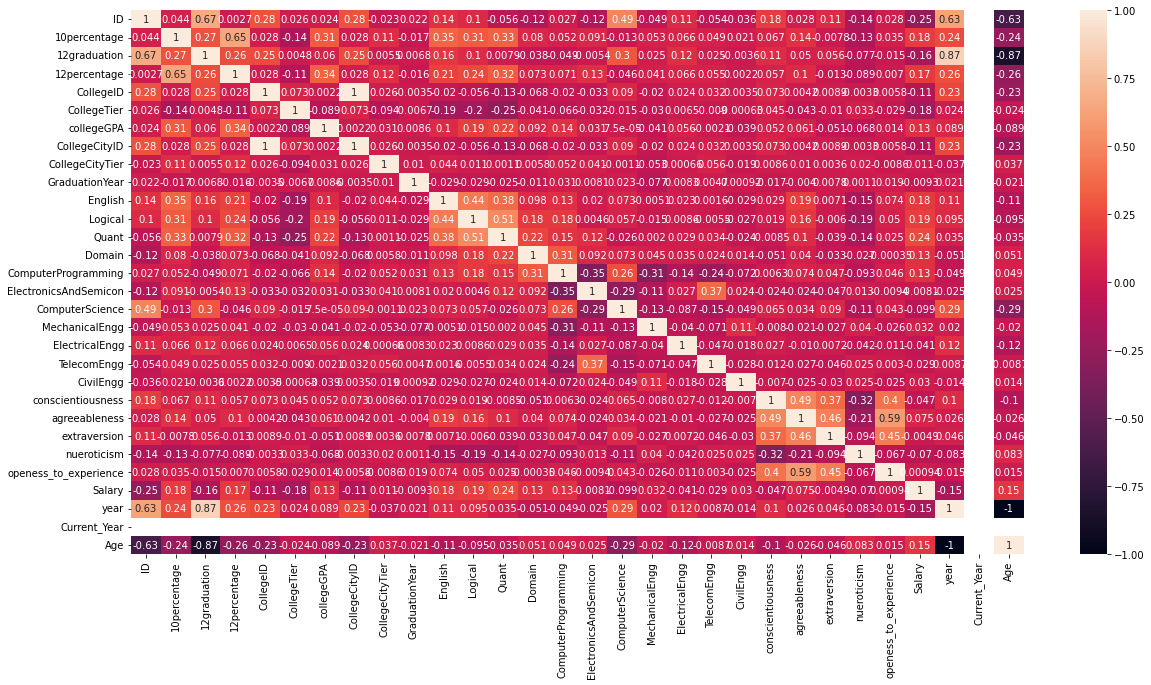

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot = True)

In [36]:
correlation_df = df.corr()
high_correlation_variables = correlation_df.index[abs(correlation_df["Salary"]) > 0.08]
high_correlation_variables

Index(['ID', '10percentage', '12graduation', '12percentage', 'CollegeID',
       'CollegeTier', 'collegeGPA', 'CollegeCityID', 'English', 'Logical',
       'Quant', 'Domain', 'ComputerProgramming', 'ComputerScience', 'Salary',
       'year', 'Age'],
      dtype='object')

In [30]:
df.columns

Index(['ID', 'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Salary', 'year',
       'Current_Year', 'Age'],
      dtype='object')

In [44]:
dataset=df[['ID', '10percentage', '12graduation', '12percentage', 'CollegeID',
       'CollegeTier', 'collegeGPA', 'CollegeCityID', 'English', 'Logical',
       'Quant', 'Domain', 'ComputerProgramming', 'ComputerScience', 'Salary',
       'Age']]

In [45]:
dataset.head()

,ID,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,English,Logical,Quant,Domain,ComputerProgramming,ComputerScience,Salary,Age
0,604399,87.80,2009,84.00,6920,1,73.82,6920,650,665,810,0.694479,485,-1,445000,32
1,988334,57.00,2010,64.50,6624,2,65.00,6624,440,435,210,0.342315,365,-1,110000,32
2,301647,77.33,2007,85.17,9084,2,61.94,9084,485,475,505,0.824666,-1,-1,255000,33
3,582313,84.30,2009,86.00,8195,1,80.40,8195,675,620,635,0.990009,655,-1,420000,31
4,339001,82.00,2008,75.00,4889,2,64.30,4889,575,495,365,0.278457,315,-1,200000,32


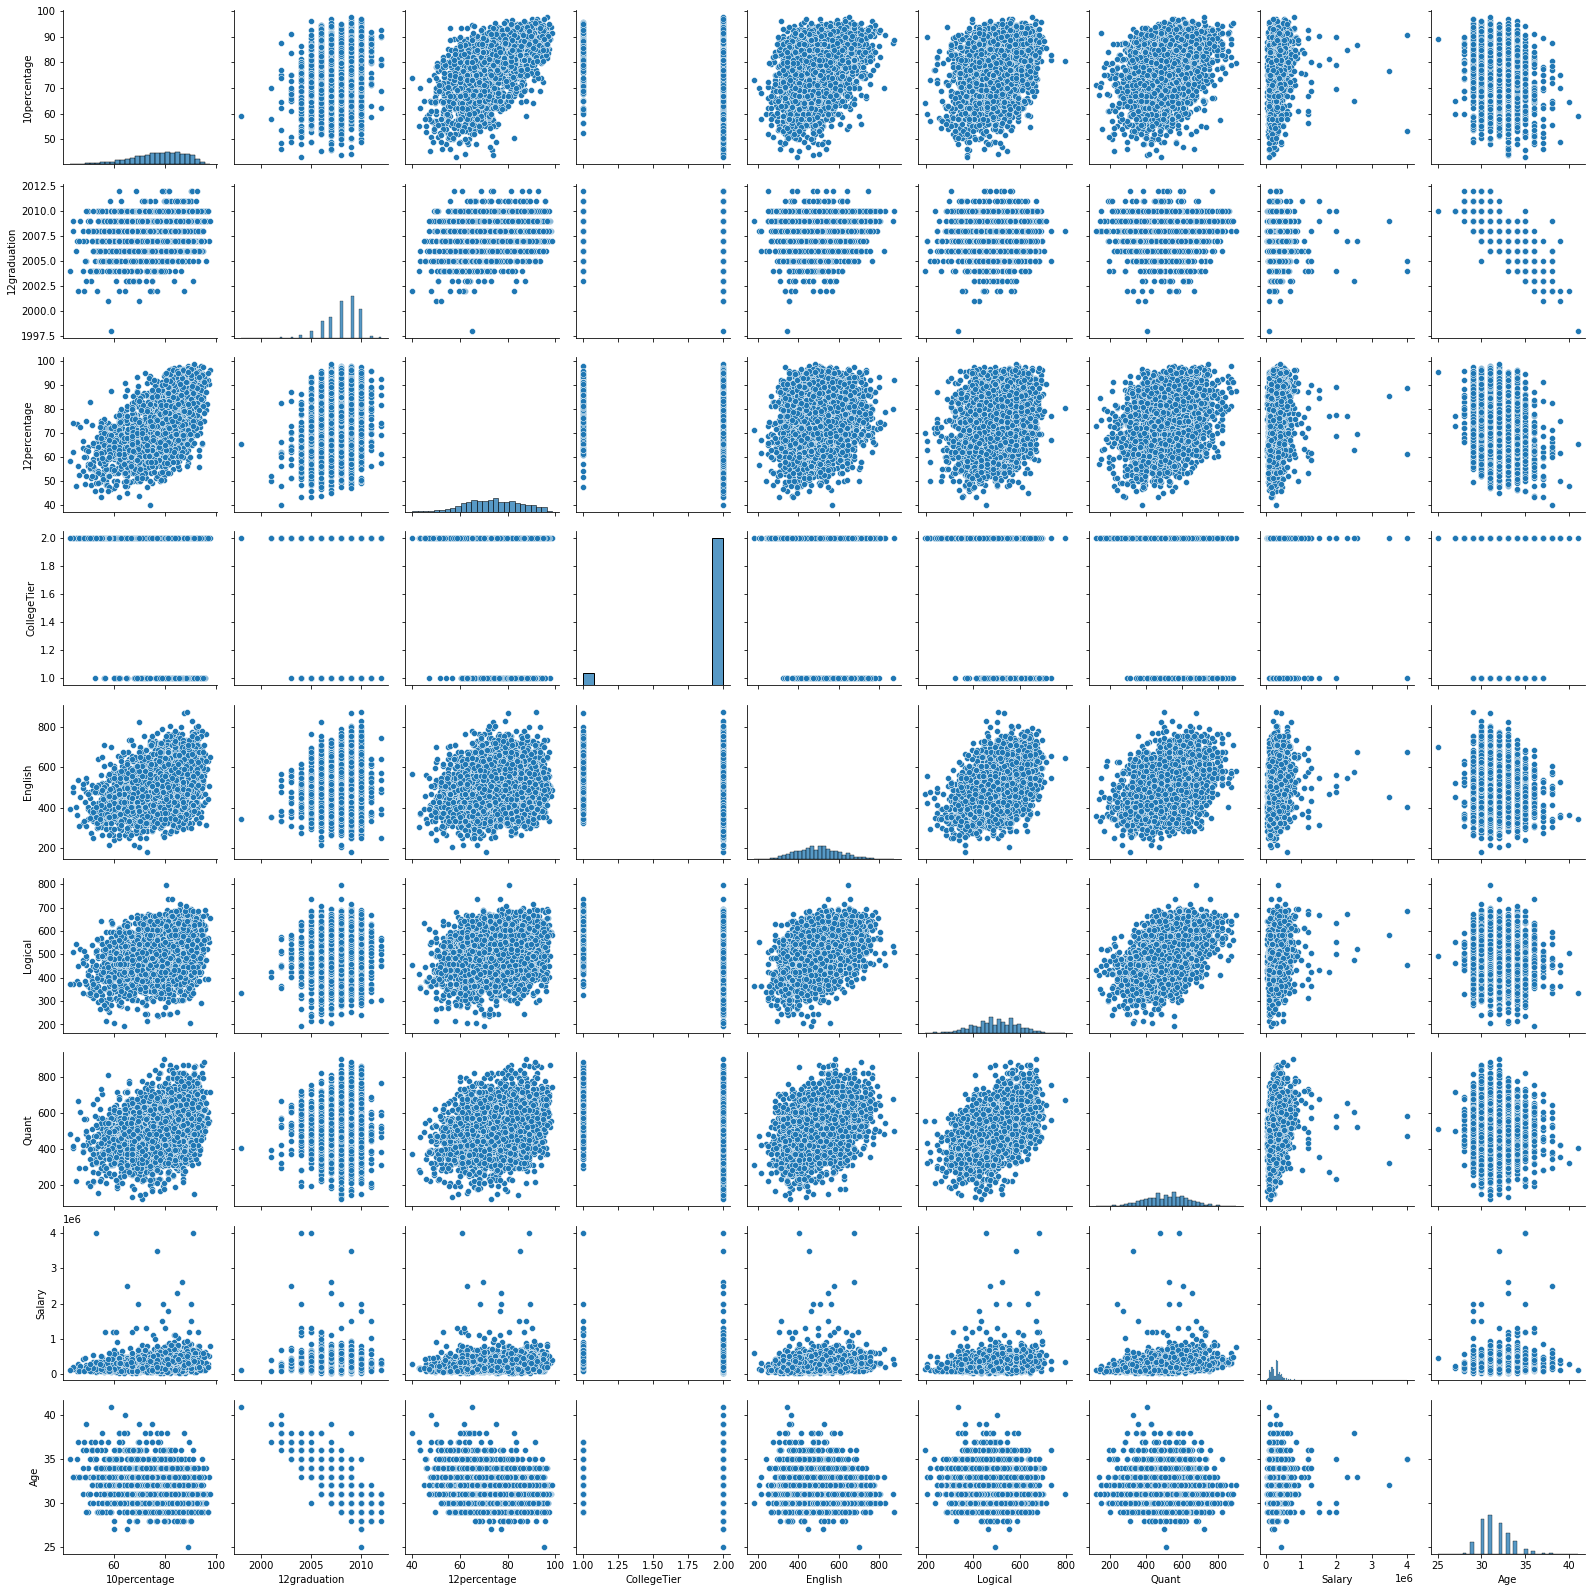

In [15]:
sns.pairplot(dataset)

In [46]:
x=dataset.drop("Salary", axis=1)
y=dataset["Salary"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=25)

In [47]:
LR_model=LinearRegression()

In [48]:
LR_model.fit(x_train,y_train)

LinearRegression()

In [49]:
LR_model.predict(x_test)

array([334130.15958067, 206346.78313942, 452804.96616122, 304611.84026641,
       452497.94866728, 307370.7482996 , 234051.18479729, 373531.41723181,
       310237.55920363, 357138.00492124, 308482.93843234, 270329.42816471,
       229706.84675394, 324310.34057281, 225910.95599492, 376214.07601141,
       352403.10057784, 205374.51128743, 415497.48512663, 310547.70661474,
       326499.55526164, 399015.33849624, 260515.92291099, 483447.65313543,
       294704.10222324, 200094.54544765, 431459.67032802, 185151.57667654,
       340326.05041745, 198281.22198121, 253020.78775356, 218132.96295985,
       171839.09686826, 287342.14235952, 264384.66643702, 355970.19325093,
       355313.98680043, 460098.73752298, 420714.84442193, 503939.9626838 ,
       174574.54838113, 323184.35665848, 278452.72181214, 401873.8351317 ,
       196952.6236337 , 243786.52484723, 338408.32580471, 308900.3763438 ,
       126894.49429822, 326333.02257853, 311532.44938979, 313113.16108764,
       255940.77755963, 3

In [50]:
def evaluation(model,x_train,x_test,y_train, y_test):
    from sklearn import metrics
    y_pred=model.predict(x_test)
    data=[]
    # R Square calculation:
    list1=["R2 score for training",metrics.r2_score(y_train,model.predict(x_train))]
    #data.append(list1)
    list2=["R2 score for testing",metrics.r2_score(y_test,y_pred)]
    #data.append(list2)
    
    # Adjusted R2 calculation:
    r2_train = model.score(x_train,y_train)
    n = x_train.shape[0]
    p = x_train.shape[1]
    adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
    list3=["Adj R2 score for training",adjusted_r2_train]
    #data.append(list3)
    
    r2_test = model.score(x_test,y_test)
    n = x_train.shape[0]
    p = x_train.shape[1]
    adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
    list4=["Adj R2 score for training",adjusted_r2_test]
    #data.append(list4)
    
    #MSE, MAE, MAPE, RMSE value calculation:
    list5=["Mean Square Error (MSE)",metrics.mean_squared_error(y_test,y_pred)]
    #data.append(list5)
    list6=["Mean Absolute Error (MAE)",metrics.mean_absolute_error(y_test,y_pred)]
    #data.append(list6)
    list7=["Mean Absolute Percentage Error (MAPE)",metrics.mean_absolute_percentage_error(y_test,y_pred)]
    #data.append(list7)
    list8=["Mean Absolute Percentage Accuracy",(1-metrics.mean_absolute_percentage_error(y_test,y_pred))*100]
    #data.append(list8)
    list9=["Root Mean Sqaure Error (RMSE)",np.sqrt(metrics.mean_squared_error(y_test,y_pred))]
    #data.append(list9)
    list_data=[list1,list2,list3,list4,list5,list6,list7,list8,list9]
    for i in list_data:
        data.append(i)
    return data

my_data=evaluation(LR_model,x_train,x_test,y_train, y_test)
from tabulate import tabulate
head=["Evaluation Parameter", "Values"]
print(tabulate(my_data, headers=head, tablefmt="grid",floatfmt=".6f"))

+---------------------------------------+--------------------+
| Evaluation Parameter                  |             Values |
+=======================================+====================+
| R2 score for training                 |           0.156982 |
+---------------------------------------+--------------------+
| R2 score for testing                  |           0.198285 |
+---------------------------------------+--------------------+
| Adj R2 score for training             |           0.151316 |
+---------------------------------------+--------------------+
| Adj R2 score for training             |           0.192898 |
+---------------------------------------+--------------------+
| Mean Square Error (MSE)               | 40649796123.239059 |
+---------------------------------------+--------------------+
| Mean Absolute Error (MAE)             |      103238.451798 |
+---------------------------------------+--------------------+
| Mean Absolute Percentage Error (MAPE) |           0.4